In [1]:
#!pip install python-twitter
import twitter
#from __future__ import print_function
import json
import sys
import pandas as pd

In [9]:

def get_tweets(api=None, screen_name=None):
    timeline = api.GetUserTimeline(screen_name=screen_name, count=200,exclude_replies=True)
    earliest_tweet = min(timeline, key=lambda x: x.id).id
    print("getting tweets before:", earliest_tweet)

    while True:
        tweets = api.GetUserTimeline(
            screen_name=screen_name, max_id=earliest_tweet, count=200
        )
        new_earliest = min(tweets, key=lambda x: x.id).id

        if not tweets or new_earliest == earliest_tweet:
            break
        else:
            earliest_tweet = new_earliest
            print("getting tweets before:", earliest_tweet)
            timeline += tweets

    return timeline

In [24]:
twtsdate = []
twtstxt = []

api = twitter.Api(consumer_key='',
                  consumer_secret='',
                  access_token_key='',
                  access_token_secret='')

#----------------------------------------------------------------------
screen_name = 'Metrovias' #<<<<<<<<<---------------------INPUT---------
#----------------------------------------------------------------------


#get tweets
timeline = get_tweets(api=api, screen_name=screen_name)

#saves json
with open(screen_name + '.json', 'w+') as f:
    for tweet in timeline:
        f.write(json.dumps(tweet._json))
        f.write('\n')
        
#open json creates DF
#with open(screen_name + '.json', 'r') as f:
#    for line in f:
#        tweet = json.loads(line)
#        #ts = time.strftime('%Y-%m-%d %H:%M:%S', time.strptime(tweet['created_at'],'%a %b %d %H:%M:%S +0000 %Y'))
#        twtsdate.append(tweet['created_at'])
#        twtstxt.append(tweet['text'])

#twtsdates = pd.Series(twtsdate)
#twtstxts = pd.Series(twtstxt)

#df = pd.concat([twtsdates.rename('DATE') ,twtstxts.rename("TEXT")] ,  axis=1)
#df['DATE'] = pd.to_datetime(pd.Series(df['DATE']))

getting tweets before: 1094511776430022656
getting tweets before: 1084828041346465793
getting tweets before: 1074742026460168192
getting tweets before: 1067366829071523840
getting tweets before: 1060501447278780417
getting tweets before: 1054342522200342533
getting tweets before: 1047461700478406656
getting tweets before: 1041277011115819008
getting tweets before: 1034493287145656323
getting tweets before: 1026739992645783552
getting tweets before: 1020085631555338241
getting tweets before: 1012677604187484160
getting tweets before: 1004801653143490562
getting tweets before: 998153886723604480
getting tweets before: 992751084476170241
getting tweets before: 987668535106252800
getting tweets before: 987303537070804993


In [1]:
#open alone without extractr
import json
import sys
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import plotly.plotly as ply
import plotly.graph_objs as go
import datetime
import numpy as np


twtsdate = []
twtstxt = []
screen_name = 'Metrovias' #<<<<<<<<<---------------------INPUT---------
with open(screen_name + '.json', 'r') as f:
    for line in f:
        tweet = json.loads(line)
        #ts = time.strftime('%Y-%m-%d %H:%M:%S', time.strptime(tweet['created_at'],'%a %b %d %H:%M:%S +0000 %Y'))
        twtsdate.append(tweet['created_at'])
        twtstxt.append(tweet['text'])

twtsdates = pd.Series(twtsdate)
twtstxts = pd.Series(twtstxt)

df = pd.concat([twtsdates.rename('DATE') ,twtstxts.rename("TEXT")] ,  axis=1)


#extract time from date
#http://pandas.pydata.org/pandas-docs/stable/reference/series.html#time-series-related
df['Datestamp'] = pd.to_datetime(pd.Series(df['DATE']))
df['TIME'] = df['Datestamp'].dt.time
df['DATE'] = df['Datestamp'].dt.date
df['WeekDay'] = df['Datestamp'].dt.strftime("%A")


#exract tweet type
df['Demora']= df.apply(lambda x: "demora" in x.TEXT, axis=1)
df['Sinterrumpido']= df.apply(lambda x: "interrumpido" in x.TEXT, axis=1)
df['Snormal']= df.apply(lambda x: "frecuencia normal" in x.TEXT, axis=1)
df['SdemFG']= df.apply(lambda x: "fuerza gremial" in x.TEXT, axis=1)
df['Slimitado']= df.apply(lambda x: "limitado" in x.TEXT, axis=1)

#df.drop(['time'],axis=1,inplace=True)

#extract type of subway
#https://stackoverflow.com/questions/43855685/python-pandas-check-if-string-in-one-column-is-contained-in-string-of-another-c
df['Linea A'] = df.apply(lambda x: "LíneaA" in x.TEXT, axis=1)
df['Linea B'] = df.apply(lambda x: "LíneaB" in x.TEXT, axis=1)
df['Linea C'] = df.apply(lambda x: "LíneaC" in x.TEXT, axis=1)
df['Linea D'] = df.apply(lambda x: "LíneaD" in x.TEXT, axis=1)

#drop rows with no tweet type identified
df[(df.Demora == False) & (df.Sinterrumpido == False)& (df.Snormal == False)& (df.SdemFG == False)&(df.Slimitado == False)] 

In [15]:
#dataset by subway type and their plot
dfA = df[df['Linea A']==True]
dfA.drop(['Linea B'],axis=1,inplace=True)
dfA.drop(['Linea C'],axis=1,inplace=True)
dfA.drop(['Linea D'],axis=1,inplace=True)

dfB = df[df['Linea B']==True]
dfB.drop(['Linea A'],axis=1,inplace=True)
dfB.drop(['Linea C'],axis=1,inplace=True)
dfB.drop(['Linea D'],axis=1,inplace=True)

dfC = df[df['Linea C']==True]
dfC.drop(['Linea B'],axis=1,inplace=True)
dfC.drop(['Linea A'],axis=1,inplace=True)
dfC.drop(['Linea D'],axis=1,inplace=True)

dfD = df[df['Linea D']==True]
dfD.drop(['Linea B'],axis=1,inplace=True)
dfD.drop(['Linea C'],axis=1,inplace=True)
dfD.drop(['Linea A'],axis=1,inplace=True)

fig, ax = plt.subplots(figsize=(50,5))
ax.plot_date(dfA['DATE'], dfA['TIME'], color='r')
plt.show()

fig, ax = plt.subplots(figsize=(50,5))
ax.plot_date(dfB['DATE'], dfB['TIME'], color='r')
plt.show()

fig, ax = plt.subplots(figsize=(50,5))
ax.plot_date(dfC['DATE'], dfC['TIME'], color='r')
plt.show()

fig, ax = plt.subplots(figsize=(50,5))
ax.plot_date(dfD['DATE'], dfD['TIME'], color='r')
plt.show()



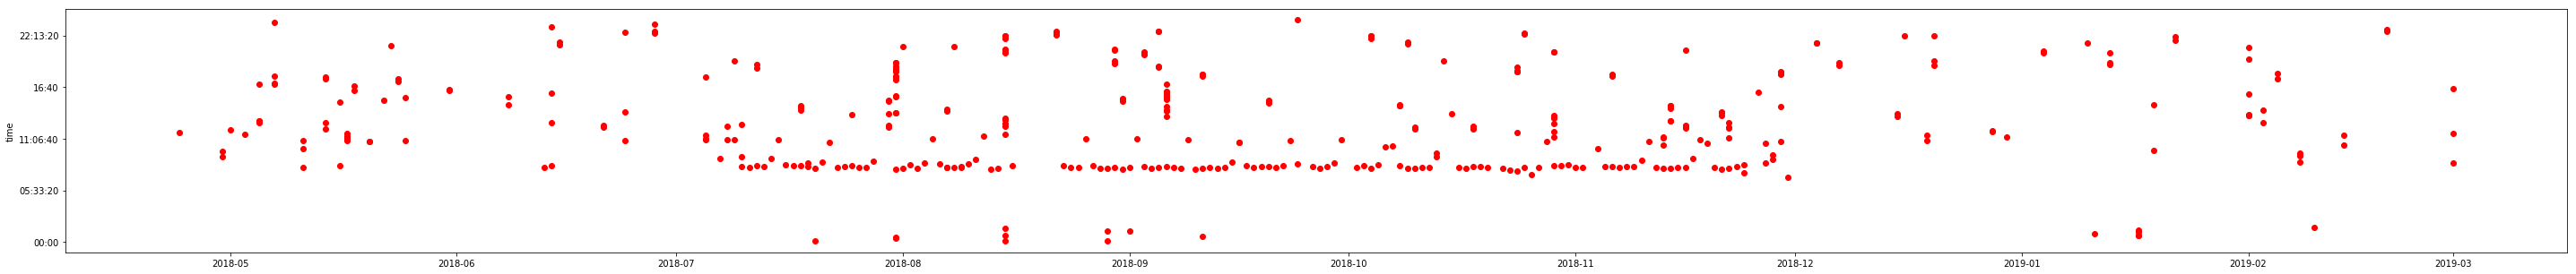

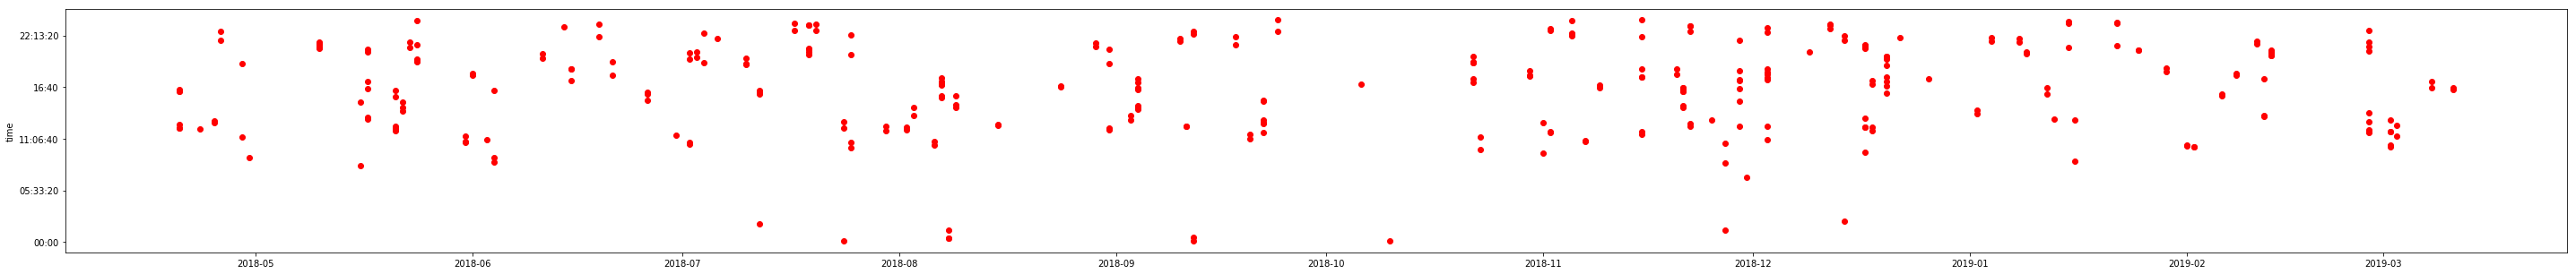

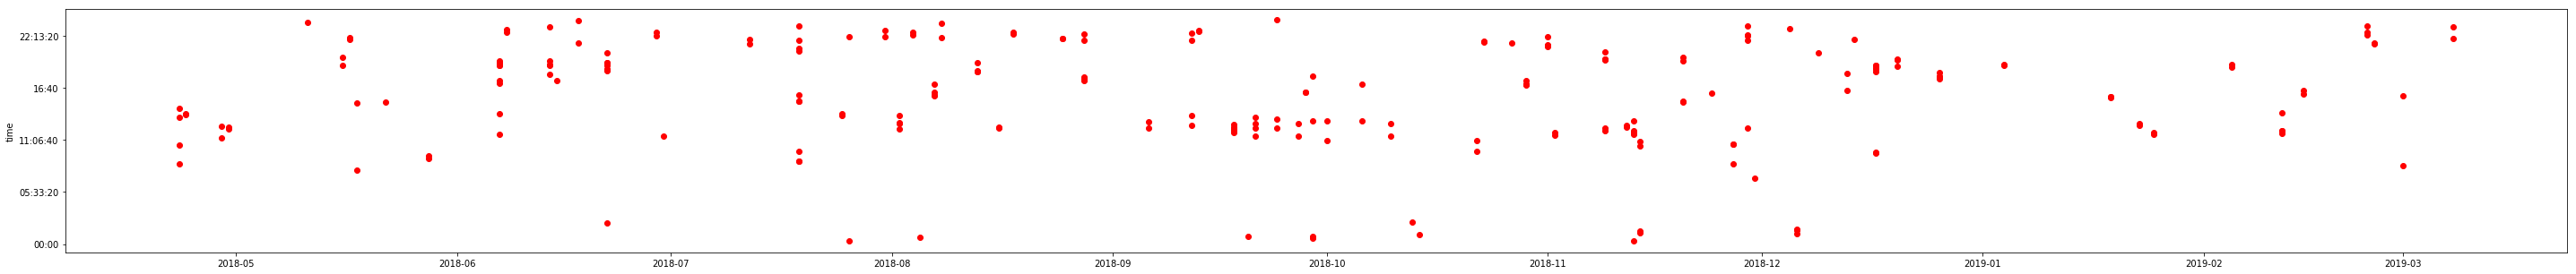

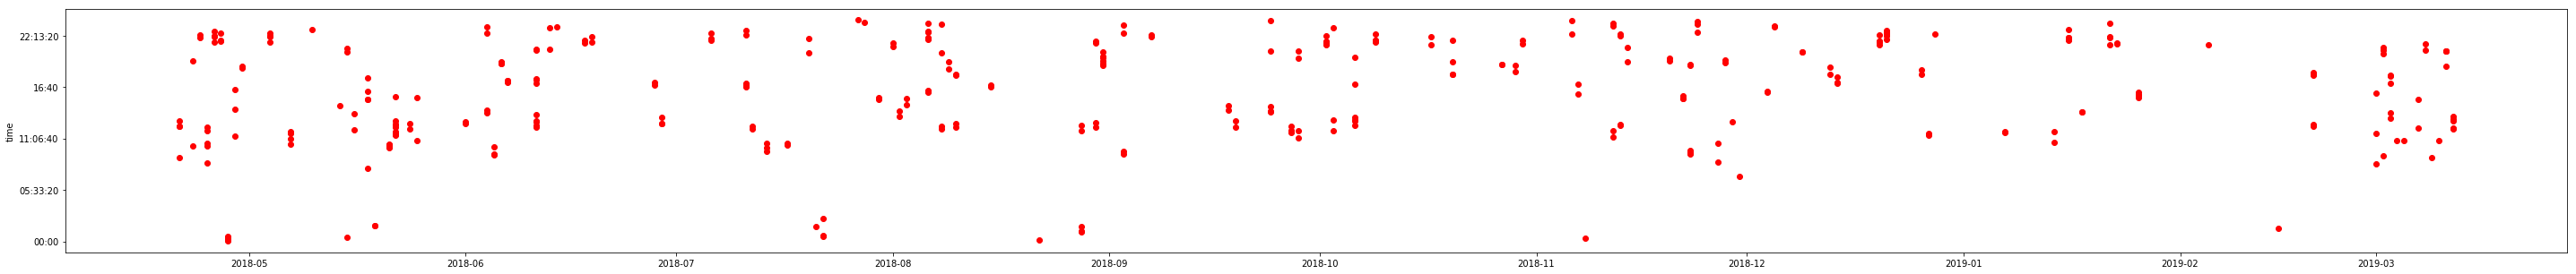

In [16]:
#dfA2 = df[(df['Linea A']==True) & (df['Sinterrumpido']==True)]
#dfA2

#fig, ax = plt.subplots(figsize=(10,5))
#ax.plot_date(dfA2['TIME'], dfA2['WeekDay'], color='r')
#plt.show()


